In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.duplicated().sum()

122

In [5]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features

,property_type,society,sector,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,area
0,flat,chd avenue,sector 71,1.1,6790.0,Super Built up area 1620(150.5 sq.m.),3,3,3,others,11.0,NaN,1 to 5 Year Old,"['Huda City Centre', 'Apna Mart', 'Rajiv Chowk', 'Sohna Road', 'IFFCO Chowk', 'Medanta Hospital', 'Max Hospital, Gurugram', 'IGI Airport', 'HDFC Bank', 'Candor Park', 'Marriott Courtyard', 'Radisson Suites', 'Park Plaza', 'Flipkart Warehouse', 'Sadar Police Station']",[],"['Intercom Facility', 'Lift(s)', 'Feng Shui / Vaastu Compliant', 'Security Personnel', 'Maintenance Staff', 'Internet/wi-fi connectivity', 'Swimming Pool', 'Park', 'Club house / Community Center', 'Fitness Centre / GYM', 'Water softening plant', 'Rain Water Harvesting', 'Shopping Centre']",1620.0


## 1. areaWithType

In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
207,0.46,990.0,Built Up area: 990 (91.97 sq.m.)
3666,1.40,2600.0,Super Built up area 2600(241.55 sq.m.)Carpet area: 2100 sq.ft. (195.1 sq.m.)
3232,1.25,1763.0,Super Built up area 1763(163.79 sq.m.)Built Up area: 1350 sq.ft. (125.42 sq.m.)Carpet area: 1234 sq.ft. (114.64 sq.m.)
11,1.10,990.0,Built Up area: 990 (91.97 sq.m.)
3311,5.00,2895.0,Super Built up area 2895(268.95 sq.m.)Built Up area: 2500 sq.ft. (232.26 sq.m.)Carpet area: 2200 sq.ft. (204.39 sq.m.)


In [7]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3335,0.72,flat,7603.0,Carpet area: 706,NaN,NaN,706.0
3646,1.00,flat,1225.0,Built Up area: 1250 (116.13 sq.m.)Carpet area: 915 sq.ft. (85.01 sq.m.),NaN,1250.0,915.0
2270,0.99,flat,1790.0,Super Built up area 1790(166.3 sq.m.),1790.0,NaN,NaN
2153,1.10,flat,1350.0,Built Up area: 1350 (125.42 sq.m.)Carpet area: 1050 sq.ft. (97.55 sq.m.),NaN,1350.0,1050.0
1223,1.10,flat,1300.0,Carpet area: 1300 (120.77 sq.m.),NaN,NaN,1300.0


In [12]:
df.duplicated().sum()

122

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,7.85,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
8,7.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
12,1.90,house,540.0,Plot area 60(50.17 sq.m.)Built Up area: 60 sq.yards (50.17 sq.m.),NaN,60.0,NaN
26,3.60,house,1449.0,Plot area 161(134.62 sq.m.),NaN,NaN,NaN
30,3.20,house,2250.0,Plot area 250(209.03 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
area                     18
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,7.85,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
8,7.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
26,3.60,house,1449.0,Plot area 161(134.62 sq.m.),NaN,NaN,NaN
30,3.20,house,2250.0,Plot area 250(209.03 sq.m.),NaN,NaN,NaN
35,8.50,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [19]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [21]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,7.85,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
8,7.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
26,3.60,house,1449.0,Plot area 161(134.62 sq.m.),NaN,161.00,NaN
30,3.20,house,2250.0,Plot area 250(209.03 sq.m.),NaN,250.00,NaN
35,8.50,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,4000.00,NaN
37,1.15,house,275.0,Plot area 275(25.55 sq.m.),NaN,275.00,NaN
48,2.20,house,909.0,Plot area 101(84.45 sq.m.),NaN,101.00,NaN
63,0.37,house,360.0,Plot area 360(33.45 sq.m.),NaN,360.00,NaN
65,17.00,house,4500.0,Plot area 4500(418.06 sq.m.),NaN,4500.00,NaN
66,5.00,house,2250.0,Plot area 250(209.03 sq.m.),NaN,250.00,NaN


In [22]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [23]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [24]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,7.85,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
8,7.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
26,3.60,house,1449.0,Plot area 161(134.62 sq.m.),NaN,1449.00,NaN
30,3.20,house,2250.0,Plot area 250(209.03 sq.m.),NaN,2250.00,NaN
35,8.50,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,4000.00,NaN
37,1.15,house,275.0,Plot area 275(25.55 sq.m.),NaN,275.00,NaN
48,2.20,house,909.0,Plot area 101(84.45 sq.m.),NaN,909.00,NaN
63,0.37,house,360.0,Plot area 360(33.45 sq.m.),NaN,360.00,NaN
65,17.00,house,4500.0,Plot area 4500(418.06 sq.m.),NaN,4500.00,NaN
66,5.00,house,2250.0,Plot area 250(209.03 sq.m.),NaN,2250.00,NaN


In [25]:
# update the original dataframe
df.update(all_nan_df)

In [26]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
area                     18
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [27]:
df.head()

,property_type,society,sector,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,area,super_built_up_area,built_up_area,carpet_area
0,flat,chd avenue,sector 71,1.10,6790.0,Super Built up area 1620(150.5 sq.m.),3,3,3,others,11.0,NaN,1 to 5 Year Old,"['Huda City Centre', 'Apna Mart', 'Rajiv Chowk', 'Sohna Road', 'IFFCO Chowk', 'Medanta Hospital', 'Max Hospital, Gurugram', 'IGI Airport', 'HDFC Bank', 'Candor Park', 'Marriott Courtyard', 'Radisson Suites', 'Park Plaza', 'Flipkart Warehouse', 'Sadar Police Station']",[],"['Intercom Facility', 'Lift(s)', 'Feng Shui / Vaastu Compliant', 'Security Personnel', 'Maintenance Staff', 'Internet/wi-fi connectivity', 'Swimming Pool', 'Park', 'Club house / Community Center', 'Fitness Centre / GYM', 'Water softening plant', 'Rain Water Harvesting', 'Shopping Centre']",1620.0,1620.0,NaN,NaN
1,flat,tulip violet,sector 69,3.10,9822.0,Super Built up area 3156(293.2 sq.m.)Carpet area: 2500 sq.ft. (232.26 sq.m.),4,6,3+,"servant room,pooja room",14.0,North,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']","['1 Dining Table', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",3156.0,3156.0,NaN,2500.0
2,house,independent,sector 43,7.85,29074.0,Plot area 300(250.84 sq.m.),9,9,3+,"pooja room,study room,servant room,others",3.0,West,1 to 5 Year Old,"['Mg road metro station', 'Iffco chowk metro station', 'Arya Samaj Mandir', 'Jain Bhawan', 'Hanuman Mandir', 'Axis bank ATM', 'Punjab national bank ATM', 'Icici bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Sidhesh Hospital Gurgaon', 'Lord Krishna Hospital', 'Privat Hospital', 'Uma Sanjeevani Health Centre And Hospital', 'Surgi Center Clinic', 'Umkal Hospital', 'Sitaram Bhartia', 'Religare Wellness', '98.4', 'Guardian', 'DLF Cyber City Phase II', 'DT Cinemas', 'PVR Metropolitan', 'PVR Cinames', 'DT Cinemas', 'PVR Cinames', 'Indusind bank', 'Abn amro bank', 'Lord krishna bank', 'Hdfc bank', 'Kotak mahindra bank', 'Hsbc bank', 'Axis bank', 'Axis bank', 'NutrioBox Gurugram', 'Pan Bangkok', 'Barbecue Grill', 'Dighent cafe', 'Fat', 'Nowhere Brewpub and cafe', 'Belgian Waffle', 'Drunken Monkey', 'CCD', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Pizza Hut', 'American Montessori', 'Bahrisons library']","['1 Fridge', '12 Fan', '1 Exhaust Fan', '12 Geyser', '16 Light', '1 Modular Kitchen', '13 AC', '20 Curtains', '3 Chimney', '9 Wardrobe', '3 Microwave', 'No Bed', 'No Dining Table', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",2700.0,NaN,2700.0,NaN
3,flat,chd avenue,sector 71,0.98,6049.0,Super Built up area 1620(150.5 sq.m.),3,3,3,study r

## 2.additionalRoom

In [28]:
df['additionalRoom'].value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,store room,study 

In [29]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [30]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3196,study room,1,0,0,0,0
1862,not available,0,0,0,0,0
3221,not available,0,0,0,0,0
291,not available,0,0,0,0,0
268,servant room,0,1,0,0,0


In [31]:
df.head()

,property_type,society,sector,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,area,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,chd avenue,sector 71,1.10,6790.0,Super Built up area 1620(150.5 sq.m.),3,3,3,others,11.0,NaN,1 to 5 Year Old,"['Huda City Centre', 'Apna Mart', 'Rajiv Chowk', 'Sohna Road', 'IFFCO Chowk', 'Medanta Hospital', 'Max Hospital, Gurugram', 'IGI Airport', 'HDFC Bank', 'Candor Park', 'Marriott Courtyard', 'Radisson Suites', 'Park Plaza', 'Flipkart Warehouse', 'Sadar Police Station']",[],"['Intercom Facility', 'Lift(s)', 'Feng Shui / Vaastu Compliant', 'Security Personnel', 'Maintenance Staff', 'Internet/wi-fi connectivity', 'Swimming Pool', 'Park', 'Club house / Community Center', 'Fitness Centre / GYM', 'Water softening plant', 'Rain Water Harvesting', 'Shopping Centre']",1620.0,1620.0,NaN,NaN,0,0,0,0,1
1,flat,tulip violet,sector 69,3.10,9822.0,Super Built up area 3156(293.2 sq.m.)Carpet area: 2500 sq.ft. (232.26 sq.m.),4,6,3+,"servant room,pooja room",14.0,North,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']","['1 Dining Table', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",3156.0,3156.0,NaN,2500.0,0,1,0,1,0
2,house,independent,sector 43,7.85,29074.0,Plot area 300(250.84 sq.m.),9,9,3+,"pooja room,study room,servant room,others",3.0,West,1 to 5 Year Old,"['Mg road metro station', 'Iffco chowk metro station', 'Arya Samaj Mandir', 'Jain Bhawan', 'Hanuman Mandir', 'Axis bank ATM', 'Punjab national bank ATM', 'Icici bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Sidhesh Hospital Gurgaon', 'Lord Krishna Hospital', 'Privat Hospital', 'Uma Sanjeevani Health Centre And Hospital', 'Surgi Center Clinic', 'Umkal Hospital', 'Sitaram Bhartia', 'Religare Wellness', '98.4', 'Guardian', 'DLF Cyber City Phase II', 'DT Cinemas', 'PVR Metropolitan', 'PVR Cinames', 'DT Cinemas', 'PVR Cinames', 'Indusind bank', 'Abn amro bank', 'Lord krishna bank', 'Hdfc bank', 'Kotak mahindra bank', 'Hsbc bank', 'Axis bank', 'Axis bank', 'NutrioBox Gurugram', 'Pan Bangkok', 'Barbecue Grill', 'Dighent cafe', 'Fat', 'Nowhere Brewpub and cafe', 'Belgian Waffle', 'Drunken Monkey', 'CCD', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Pizza Hut', 'American Montessori', 'Bahrisons library']","['1 Fridge', '12 Fan', '1 Exhaust Fan', '12 Geyser', '16 Light', '1 Modular Kitchen', '13 AC', '20 Curtains', '3 Chimney', '9 Wardrobe', '3 Microwave', 'No Bed', 'No Dining Table', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",2700.0,NaN,2700.0,NaN,1,1,0,1,1
3,flat,c

## 3.agePossession

In [32]:
df['agePossession'].value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Jun 2024                 7
Aug 2023                 7
Dec 2025                 7
Nov 2023                 5
Aug 2024                 4
Sep 2023                 4
Oct 2023                 4
By 2025                  4
Jul 2024                 4
Feb 2024                 3
Jan 2025                 3
May 2024                 3
Nov 2024                 3
By 2027                  2
Apr 2026                 2
Jun 2027                 2
Sep 2025                 2
Mar 2025                 2
Jan 2026                 2
Dec 2026                 2
Jul 2025                 2
Jul 2027                 2
A

In [33]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [34]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [35]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: agePossession, dtype: int64

In [36]:
df.head()

,property_type,society,sector,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,area,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,chd avenue,sector 71,1.10,6790.0,Super Built up area 1620(150.5 sq.m.),3,3,3,others,11.0,NaN,Relatively New,"['Huda City Centre', 'Apna Mart', 'Rajiv Chowk', 'Sohna Road', 'IFFCO Chowk', 'Medanta Hospital', 'Max Hospital, Gurugram', 'IGI Airport', 'HDFC Bank', 'Candor Park', 'Marriott Courtyard', 'Radisson Suites', 'Park Plaza', 'Flipkart Warehouse', 'Sadar Police Station']",[],"['Intercom Facility', 'Lift(s)', 'Feng Shui / Vaastu Compliant', 'Security Personnel', 'Maintenance Staff', 'Internet/wi-fi connectivity', 'Swimming Pool', 'Park', 'Club house / Community Center', 'Fitness Centre / GYM', 'Water softening plant', 'Rain Water Harvesting', 'Shopping Centre']",1620.0,1620.0,NaN,NaN,0,0,0,0,1
1,flat,tulip violet,sector 69,3.10,9822.0,Super Built up area 3156(293.2 sq.m.)Carpet area: 2500 sq.ft. (232.26 sq.m.),4,6,3+,"servant room,pooja room",14.0,North,Relatively New,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']","['1 Dining Table', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",3156.0,3156.0,NaN,2500.0,0,1,0,1,0
2,house,independent,sector 43,7.85,29074.0,Plot area 300(250.84 sq.m.),9,9,3+,"pooja room,study room,servant room,others",3.0,West,Relatively New,"['Mg road metro station', 'Iffco chowk metro station', 'Arya Samaj Mandir', 'Jain Bhawan', 'Hanuman Mandir', 'Axis bank ATM', 'Punjab national bank ATM', 'Icici bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Sidhesh Hospital Gurgaon', 'Lord Krishna Hospital', 'Privat Hospital', 'Uma Sanjeevani Health Centre And Hospital', 'Surgi Center Clinic', 'Umkal Hospital', 'Sitaram Bhartia', 'Religare Wellness', '98.4', 'Guardian', 'DLF Cyber City Phase II', 'DT Cinemas', 'PVR Metropolitan', 'PVR Cinames', 'DT Cinemas', 'PVR Cinames', 'Indusind bank', 'Abn amro bank', 'Lord krishna bank', 'Hdfc bank', 'Kotak mahindra bank', 'Hsbc bank', 'Axis bank', 'Axis bank', 'NutrioBox Gurugram', 'Pan Bangkok', 'Barbecue Grill', 'Dighent cafe', 'Fat', 'Nowhere Brewpub and cafe', 'Belgian Waffle', 'Drunken Monkey', 'CCD', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Pizza Hut', 'American Montessori', 'Bahrisons library']","['1 Fridge', '12 Fan', '1 Exhaust Fan', '12 Geyser', '16 Light', '1 Modular Kitchen', '13 AC', '20 Curtains', '3 Chimney', '9 Wardrobe', '3 Microwave', 'No Bed', 'No Dining Table', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",2700.0,NaN,2700.0,NaN,1,1,0,1,1
3,flat,chd 

## 4.furnishDetails

In [37]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1170,[],['Natural Light']
2256,"['5 Fan', '6 Light', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2125,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN
2082,NaN,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park']"
1281,"['3 Wardrobe', '3 Fan', '1 Fridge', '3 Geyser', '1 Washing Machine', '5 AC', '1 Modular Kitchen', '1 Chimney', '2 Curtains', 'No Bed', 'No Dining Table', 'No Exhaust Fan', 'No Light', 'No Microwave', 'No Sofa', 'No Stove', 'No TV', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM']"


In [38]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [39]:
furnishings_df.shape

(3803, 19)

In [40]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-40-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [41]:
furnishings_df.sample(5)

,Water Purifier,Modular Kitchen,AC,Microwave,Exhaust Fan,Fridge,Geyser,Washing Machine,Dining Table,Bed,Chimney,Light,TV,Curtains,Stove,Sofa,Wardrobe,Fan
1303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2352,0,1,4,1,1,0,4,0,0,0,1,18,0,0,0,0,4,6
505,0,0,6,0,1,0,1,0,0,0,0,6,0,0,0,0,0,7
3701,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3641,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [44]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

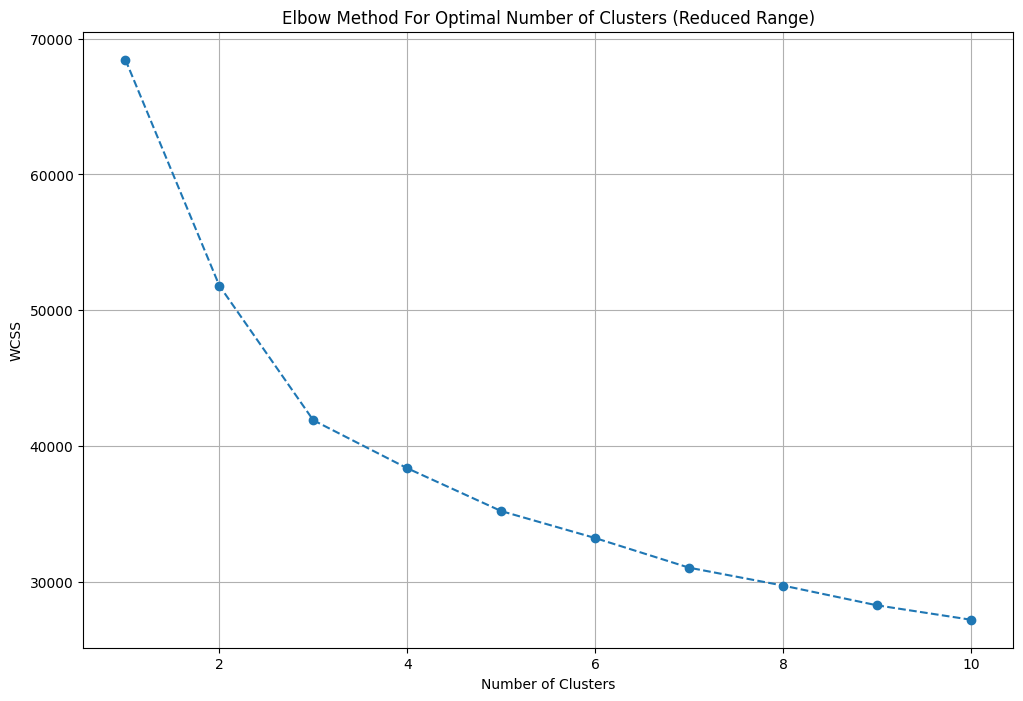

In [45]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [46]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
df = df.iloc[:,:-18]

In [48]:
df['furnishing_type'] = cluster_assignments

In [49]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1225,[],0
2790,NaN,0
3323,"['5 Fan', '3 Geyser', '5 Light', '5 AC', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
2641,NaN,0
326,"['3 Wardrobe', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '2 Geyser', '4 Light', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']",2


## 5.features

In [50]:
df[['society','features']].sample(5)

,society,features
2047,ansals florence villa,"['Feng Shui / Vaastu Compliant', 'Park', 'Rain Water Harvesting']"
3397,emaar mgf emerald floors premier,"['Intercom Facility', 'Lift(s)', 'Park']"
2375,orris aster court premier,"['Swimming Pool', 'Fitness Centre / GYM']"
752,paras dews,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
520,vipul world floors,"['Lift(s)', 'Centrally Air Conditioned', 'High Ceiling Height', 'False Ceiling Lighting', 'Separate entry for servant room', 'No open drainage around', 'Swimming Pool', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"


In [51]:
df['features'].isnull().sum()

635

In [53]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [54]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [55]:
temp_df = df[df['features'].isnull()]

In [56]:
temp_df.shape

(635, 26)

In [57]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [58]:
df.loc[temp_df.index,'features'] = x.values

In [59]:
df['features'].isnull().sum()

481

In [60]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [61]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [62]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1064,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
490,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
874,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
2315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1056,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0


In [63]:
features_binary_df.shape

(3803, 130)

In [64]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

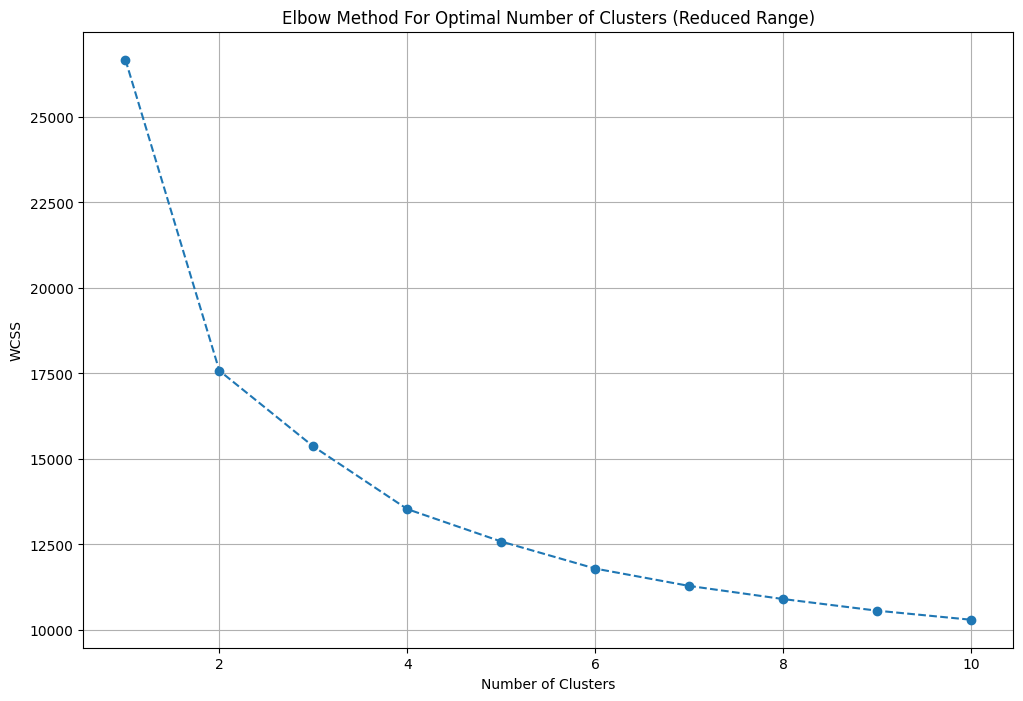

In [65]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [66]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [67]:
df['luxury_score'] = luxury_score

In [ ]:
df.head()

In [69]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [70]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,area,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
847,flat,m3m skywalk,sector 74,2.2,10901.0,Super Built up area 2018(187.48 sq.m.),3,3,3,12.0,NaN,New Property,2018.0,2018.0,NaN,NaN,1,0,0,0,0,2,15
1315,flat,sobha city,sector 108,2.6,15195.0,Super Built up area 1711(158.96 sq.m.),3,3,2,8.0,East,Relatively New,1711.0,1711.0,NaN,NaN,0,0,0,0,0,0,99
3265,flat,zara aavaas,sector 104,0.4,7029.0,Super Built up area 569(52.86 sq.m.),2,2,1,14.0,NaN,Relatively New,569.0,569.0,NaN,NaN,0,0,0,0,0,0,38
2158,flat,cghs vidya enclave,sector 56,1.7,10967.0,Super Built up area 1600(148.64 sq.m.)Carpet area: 1550 sq.ft. (144 sq.m.),3,2,3,6.0,NaN,Old Property,1550.0,1600.0,NaN,1550.0,0,0,1,0,0,0,101
2257,flat,emaar palm gardens,sector 83,1.4,9675.0,Super Built up area 1720(159.79 sq.m.)Carpet area: 1447 sq.ft. (134.43 sq.m.),3,3,3,11.0,North,Relatively New,1447.0,1720.0,NaN,1447.0,0,1,0,0,0,1,58


In [71]:
df.shape

(3803, 23)

In [72]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)